In [1]:
import numpy as np


grads = np.load("data/grads_batch0_all_epochs.npz")

xi_hopf_grads = grads["xi_hopf_raw"]   # shape (epochs, M, D)


In [2]:
grads

NpzFile 'data/grads_batch0_all_epochs.npz' with keys: W_dec, a, b, b_dec, c...

In [3]:
xi_hopf_grads.shape

(30000, 16, 16)

In [4]:
import jax
import jax.numpy as jnp

norms = jax.vmap(jnp.linalg.norm, in_axes=0)(xi_hopf_grads)

Metal device set to: Apple M1 Max

systemMemory: 32.00 GB
maxCacheSize: 10.67 GB



W0000 00:00:1765602906.441843 8969553 mps_client.cc:510] WARNING: JAX Apple GPU support is experimental and not all JAX functionality is correctly supported!
I0000 00:00:1765602906.453719 8969553 service.cc:145] XLA service 0x104eb7730 initialized for platform METAL (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1765602906.453729 8969553 service.cc:153]   StreamExecutor device (0): Metal, <undefined>
I0000 00:00:1765602906.455205 8969553 mps_client.cc:406] Using Simple allocator.
I0000 00:00:1765602906.455220 8969553 mps_client.cc:384] XLA backend will use up to 22906109952 bytes on device 0 for SimpleAllocator.


In [5]:
norms

Array([1.2233750e-05, 2.0320555e-05, 1.4120573e-05, ..., 5.2082987e+00,
       3.3176603e+00, 5.2518873e+00], dtype=float32)

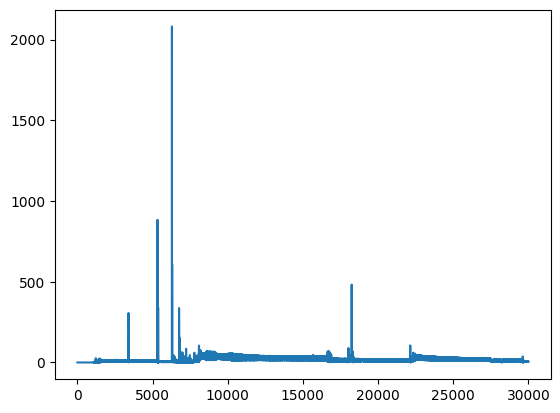

In [6]:
import matplotlib.pyplot as plt

plt.plot(norms)

In [7]:
xi_hopf_grads[-1]

array([[-2.51905024e-01, -4.80767566e-37, -5.22292256e-01,
        -2.68182659e+00,  1.42261737e-37, -5.59829596e-06,
         6.90166522e-16, -4.08853467e-37,  9.32147950e-02,
        -4.10320520e+00, -4.94245231e-01, -2.90387802e-38,
        -5.83922803e-01, -3.83455572e-38, -6.21055192e-36,
         1.84335948e-37],
       [-0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
         0.00000000e+00],
       [ 1.05514209e-06, -7.27977967e-05, -1.99397974e-07,
         1.94620247e-06, -1.49888423e-04, -1.26567215e-06,
         9.59989193e-05, -3.90076249e-10,  3.62311226e-07,
        -3.57337465e-10,  1.12981560e-11,  8.14271175e-07,
        -1.21367657e-06,  1.81956348e-04,  1.19681805e-04,
        -1.01039986e-04],
       [ 0.00000000e+00,  0.00000000e

In [8]:
jnp.percentile(norms, jnp.array([0.25, 0.5, 0.75, 0.9, 0.99, 0.99999]))

Array([4.4986250e-09, 4.8337250e-09, 5.3928768e-09, 5.8024914e-09,
       6.1298513e-09, 6.1550907e-09], dtype=float32)

In [9]:
jnp.mean(norms)

Array(17.425514, dtype=float32)

In [10]:
from config import Config